In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")


In [2]:
## Import train/test split 
from sklearn.model_selection import train_test_split



## Import our data with pandas
import pandas as pd

df = pd.read_csv(r'creditcard.csv')
#print (df)
np_vers=df.to_numpy()


X = np_vers[:,0:30]
print('Size of data is: ',str(X.shape))

y = np_vers[:,30]


## Construct the train/test split
## Use random state 471 for reproducibility

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = .15, random_state = 471)
print('There are '+str(len(y_test[y_test==1]))+' entries in our test set with value 1')
print('len(y): '+str(len(y))+' len(y_test): '+str(len(y_test))+' len(y_train): '+str(len(y_train)))

Size of data is:  (284807, 30)
There are 90 entries in our test set with value 1
len(y): 284807 len(y_test): 42722 len(y_train): 242085


On 42722 entries, our accuracy score is: 0.9989934928140068
On 90 entries with only 1's our accuracy score is: 0.6333333333333333

On 42722 entries, our precision score is: 0.8507462686567164
On 90 entries with only 1's our precision score is: 1.0

On 42722 entries, our recall score is: 0.6333333333333333
On 90 entries with only 1's our recall score is: 0.6333333333333333

On 42722 entries, our f1 score is: 0.7261146496815286
On 90 entries with only 1's our f1 score is: 0.7755102040816326

On 42722 entries, our accuracy score is: 0.9990168999578671
On 90 entries with only 1's our accuracy score is: 0.6444444444444445

On 42722 entries, our precision score is: 0.8529411764705882
On 90 entries with only 1's our precision score is: 1.0

On 42722 entries, our recall score is: 0.6444444444444445
On 90 entries with only 1's our recall score is: 0.6444444444444445

On 42722 entries, our f1 score is: 0.7341772151898734
On 90 entries with only 1's our f1 score is: 0.7837837837837839



c:\program files\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


On 42722 entries, our accuracy score is: 0.9990403071017274
On 90 entries with only 1's our accuracy score is: 0.6555555555555556

On 42722 entries, our precision score is: 0.855072463768116
On 90 entries with only 1's our precision score is: 1.0

On 42722 entries, our recall score is: 0.6555555555555556
On 90 entries with only 1's our recall score is: 0.6555555555555556

On 42722 entries, our f1 score is: 0.7421383647798742
On 90 entries with only 1's our f1 score is: 0.7919463087248323



c:\program files\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


On 42722 entries, our accuracy score is: 0.9990168999578671
On 90 entries with only 1's our accuracy score is: 0.6444444444444445

On 42722 entries, our precision score is: 0.8529411764705882
On 90 entries with only 1's our precision score is: 1.0

On 42722 entries, our recall score is: 0.6444444444444445
On 90 entries with only 1's our recall score is: 0.6444444444444445

On 42722 entries, our f1 score is: 0.7341772151898734
On 90 entries with only 1's our f1 score is: 0.7837837837837839



c:\program files\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


On 42722 entries, our accuracy score is: 0.9990168999578671
On 90 entries with only 1's our accuracy score is: 0.6444444444444445

On 42722 entries, our precision score is: 0.8529411764705882
On 90 entries with only 1's our precision score is: 1.0

On 42722 entries, our recall score is: 0.6444444444444445
On 90 entries with only 1's our recall score is: 0.6444444444444445

On 42722 entries, our f1 score is: 0.7341772151898734
On 90 entries with only 1's our f1 score is: 0.7837837837837839



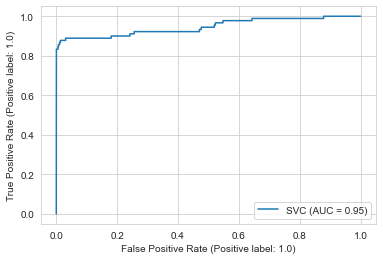

In [3]:
## SVMs are scale sensitive
## Use the standard scaler on the data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Import metrics
from sklearn.metrics import confusion_matrix

## Import ROC curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

## Import the classifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

## Import accuracy measure
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


## Make arrays where we can store our predictions
pred_array = np.zeros((len(y_test),5))
pred_array_ones = np.zeros((len(y_test[y_test==1]),5))

pred_array_train = np.zeros((len(y_train),5))
pred_array_ones_train  = np.zeros((len(y_test[y_test==1]),5))




## Now we make the classifier


## We will try some other C-values as well

list_of_C = [0.01, 0.05, 0.25, 0.5, 0.9]


#list_of_C = [0.05]


#Create empty accuracy, precision, and recall arrays for plotting (train and test)

acc = np.zeros((2,5))
prec = np.zeros((2,5))
recall = np.zeros((2,5))
f1 = np.zeros((2,5))

acc_train = np.zeros((2,5))
prec_train = np.zeros((2,5))
recall_train = np.zeros((2,5))
f1_train = np.zeros((2,5))

for i in range(0,len(list_of_C)):
    
    max_margin = Pipeline([('scaler',StandardScaler()),('clf',LinearSVC(C=list_of_C[i],max_iter=60000))])
    ## Fit the model
    max_margin.fit(X_train,y_train)
    ## Transform the test data
    X_test_transformed=max_margin['scaler'].transform(X_test)
    ## Predict on the test data
    pred = max_margin['clf'].predict(X_test_transformed)
    for j in range(len(pred)):
        pred_array[j,i] = pred[j]
    ## Predict on only the fraudulent test data
    pred_only_1 = max_margin['clf'].predict(X_test_transformed[y_test == 1,:])


    ## Transform the train data
    X_train_transformed=max_margin['scaler'].transform(X_train)
    ## Predict on the train data
    pred_train = max_margin['clf'].predict(X_train_transformed)
    for j in range(len(pred)):
        pred_array_train[j,i] = pred_train[j]
    ## Predict on only the fraudulent train data
    pred_only_1_train = max_margin['clf'].predict(X_train_transformed[y_train == 1,:])

    
   
    ## Print the accuracy of our predictions for test data
    print('On '+str(len(y_test))+' entries, our accuracy score is: '+str(accuracy_score(y_test,pred)))
    print('On '+str(len(y_test[y_test==1]))+' entries with only 1\'s our accuracy score is: '+str(accuracy_score(y_test[y_test==1],pred_only_1))+'\n')
    
    print('On '+str(len(y_test))+' entries, our precision score is: '+str(precision_score(y_test,pred)))
    print('On '+str(len(y_test[y_test==1]))+' entries with only 1\'s our precision score is: '+str(precision_score(y_test[y_test==1],pred_only_1))+'\n')
    
    print('On '+str(len(y_test))+' entries, our recall score is: '+str(recall_score(y_test,pred)))
    print('On '+str(len(y_test[y_test==1]))+' entries with only 1\'s our recall score is: '+str(recall_score(y_test[y_test==1],pred_only_1))+'\n')
    
    print('On '+str(len(y_test))+' entries, our f1 score is: '+str(f1_score(y_test,pred)))
    print('On '+str(len(y_test[y_test==1]))+' entries with only 1\'s our f1 score is: '+str(f1_score(y_test[y_test==1],pred_only_1))+'\n')
        
    
    
    ## Update arrays for plotting
    acc[0,i] = accuracy_score(y_test,pred)
    acc[1,i] = accuracy_score(y_test[y_test==1],pred_only_1)
    
    prec[0,i] = precision_score(y_test,pred)
    prec[1,i] = precision_score(y_test[y_test==1],pred_only_1)
    
    recall[0,i] = recall_score(y_test,pred)
    recall[1,i] = recall_score(y_test[y_test==1],pred_only_1)
    
    f1[0,i] = f1_score(y_test,pred)
    f1[1,i] = f1_score(y_test[y_test==1],pred_only_1)
    
    
    
    
    ## Update training arrays for plotting
    acc_train[0,i] = accuracy_score(y_train,pred_train)
    acc_train[1,i] = accuracy_score(y_train[y_train==1],pred_only_1_train)
    
    prec_train[0,i] = precision_score(y_train,pred_train)
    prec_train[1,i] = precision_score(y_train[y_train==1],pred_only_1_train)
    
    recall_train[0,i] = recall_score(y_train,pred_train)
    recall_train[1,i] = recall_score(y_train[y_train==1],pred_only_1_train)
    
    f1_train[0,i] = f1_score(y_train,pred_train)
    f1_train[1,i] = f1_score(y_train[y_train==1],pred_only_1_train)
    
    
    
## Plot ROC curve for C = 0.05
    
model = Pipeline([('scaler-roc',StandardScaler()),('clf-roc',SVC(probability = True, C = 0.05, max_iter=6000))])
                                             
model.fit(X_train, y_train)
X_test_transformed=model['scaler-roc'].transform(X_test) 
plot_roc_curve(model['clf-roc'], X_test_transformed, y_test)
    
    


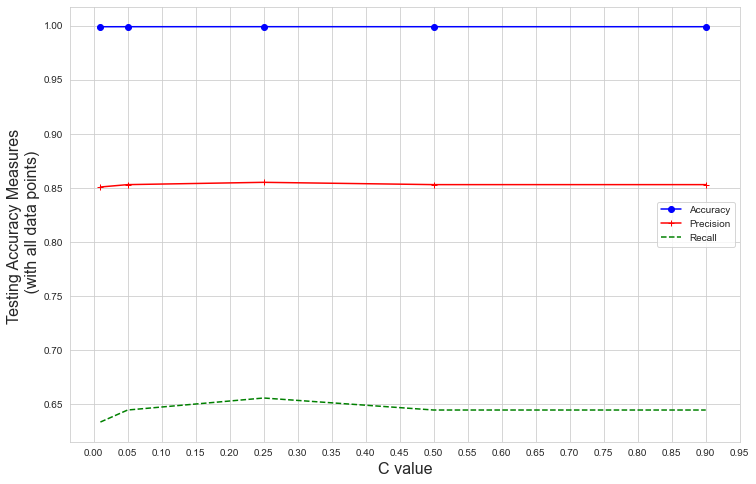

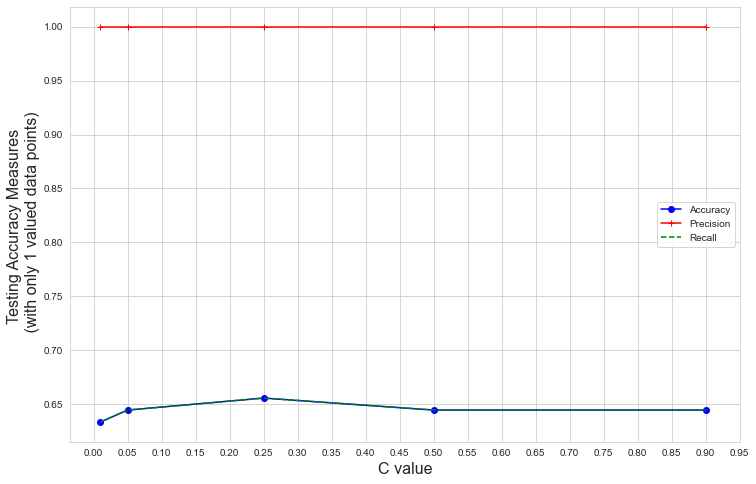

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42632
         1.0       0.85      0.63      0.73        90

    accuracy                           1.00     42722
   macro avg       0.92      0.82      0.86     42722
weighted avg       1.00      1.00      1.00     42722

 ------------------------------------------------ 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42632
         1.0       0.85      0.64      0.73        90

    accuracy                           1.00     42722
   macro avg       0.93      0.82      0.87     42722
weighted avg       1.00      1.00      1.00     42722

 ------------------------------------------------ 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42632
         1.0       0.86      0.66      0.74        90

    accuracy                           1.00     42722
   macro avg       0.93 

In [4]:
list_of_C = [0.01, 0.05, 0.25, 0.5, 0.9]


## Plot the validation accuracy measures vs. C here (all data version)

plt.figure(figsize=(12,8))

plt.plot(list_of_C, (acc[0,:]),'b-o', label="Accuracy")
plt.plot(list_of_C, (prec[0,:]),'r-+', label="Precision")
plt.plot(list_of_C, (recall[0,:]),'g', label="Recall",linestyle='dashed')


plt.xticks(np.arange(0,1,.05))

plt.xlabel("C value", fontsize=16)
plt.ylabel("Testing Accuracy Measures \n (with all data points)", fontsize=16)


plt.legend()


plt.show()

## Plot the validation accuracy measures vs. C here (only 1's data version)

plt.figure(figsize=(12,8))

plt.plot(list_of_C, (acc[1,:]),'b-o', label="Accuracy")
plt.plot(list_of_C, (prec[1,:]),'r-+', label="Precision")
plt.plot(list_of_C, (recall[1,:]),'g', label="Recall",linestyle='dashed')


plt.xticks(np.arange(0,1,.05))

plt.xlabel("C value", fontsize=16)
plt.ylabel("Testing Accuracy Measures \n (with only 1 valued data points)", fontsize=16)

plt.legend()

plt.show()




## Print out a classification report for each C value

from sklearn.metrics import classification_report

for i in range(0,5):
    print(classification_report(y_test,pred_array[:,i]))
    print(' ------------------------------------------------ \n')
    
    
    
    
## Print the confusion matrix for C = 0.05 here

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,pred_array[:,1]))